# Exploring the Stock Market Data for Tesla Inc.

In this project, I shall be carrying out a deep exploration of Tesla trading data from June 2010 to February 2020. Tesla, Inc. is an American electric vehicle and clean energy company based in Palo Alto, California. Tesla's current products include electric cars, battery energy storage from home to grid scale, solar panels and solar roof tiles, as well as other related products and services.

The data  variables are the date of the stock trade, its opening and closing share price, its lowest and highest value for the day, and then the total volume traded. And the aim of this project is to uncover the associations, behaviours and trends of the variables in the data set

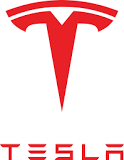

# Introduction and Overview of the Data

In [1]:
# Let's import the relevant packages needed for the analysis
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import datetime as dt
import seaborn as sns
from pandas.plotting import table


In [4]:
# Read in the dataset
tesla = pd.read_csv("TSLA.csv")
tesla

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


We need to observe the data types of the columns so as to carry out the necessary data type casting

In [5]:
# Observing datatypes
tesla.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

We need to type cast the date column and appropriately display floats

In [8]:
# type cast Date column to DateTime object
tesla['Date'] = pd.to_datetime(tesla['Date'])
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Descriptive Statistics and Imputing Missing Values

In [9]:
tesla.describe(include="all")

,Date,Open,High,Low,Close,Adj Close,Volume
count,2416,2416.00,2416.00,2416.00,2416.00,2416.00,2416.00
unique,2416,nan,nan,nan,nan,nan,nan
top,2016-11-14 00:00:00,nan,nan,nan,nan,nan,nan
freq,1,nan,nan,nan,nan,nan,nan
first,2010-06-29 00:00:00,nan,nan,nan,nan,nan,nan
last,2020-02-03 00:00:00,nan,nan,nan,nan,nan,nan
mean,NaN,186.27,189.58,182.92,186.40,186.40,5572721.69
std,NaN,118.74,120.89,116.86,119.14,119.14,4987809.15
min,NaN,16.14,16.63,14.98,15.80,15.80,118500.00
25%,NaN,34.34,34.90,33.59,34.40,34.40,1899275.00


In [10]:
tesla.isnull().values.sum() 

0

# Visualizing the Period Variations in Market Share

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002000BA70E88>,
      dtype=object)

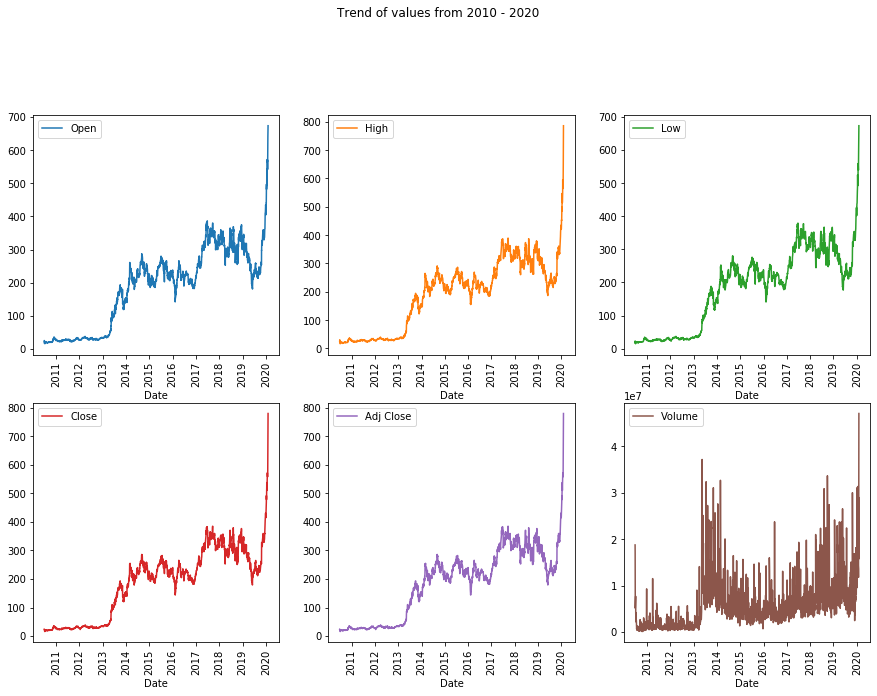

In [11]:
variable_values = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

tesla.plot(x = "Date", y = variable_values, subplots = True, layout = (3, 3), 
          figsize = (15, 15), sharex = False, title = "Trend of values from 2010 - 2020", rot = 90)

# Visualizing the Spread and Skewness using Distribution Plot

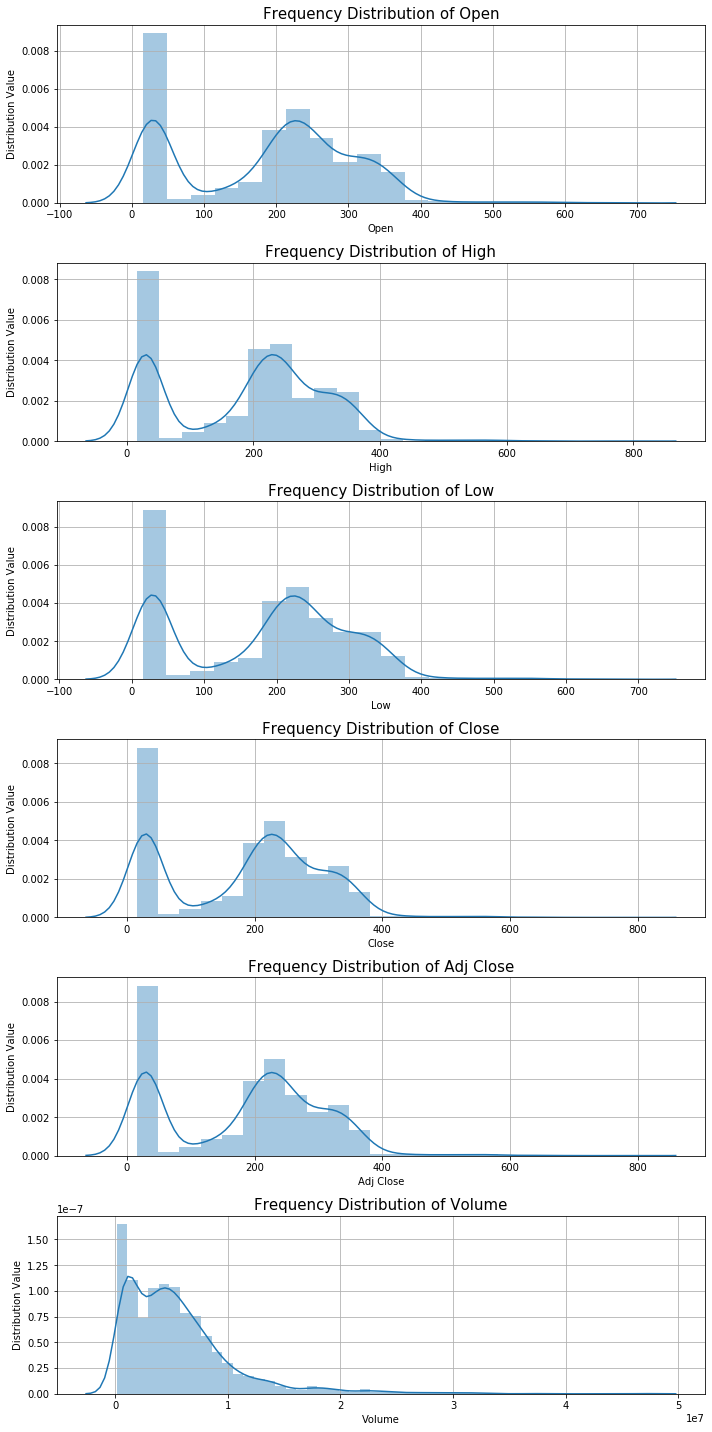

In [12]:

fig, ax = plt.subplots(len(variable_values), figsize = (10, 20))

for i, col_list in enumerate(variable_values):
    sns.distplot(tesla[col_list], hist = True, ax = ax[i])
    ax[i].set_title ("Frequency Distribution of" + " " + col_list, fontsize = 15)
    ax[i].set_xlabel (col_list, fontsize = 10)
    ax[i].set_ylabel ('Distribution Value', fontsize = 10)
    fig.tight_layout (pad = 1.1) 
    ax[i].grid('on')

# Observe and Visualize Correlations using the Pearson Method

In [17]:
variable_correlations = tesla.corr() 
variable_correlations

,Open,High,Low,Close,Adj Close,Volume
Open,1.00,1.00,1.00,1.00,1.00,0.50
High,1.00,1.00,1.00,1.00,1.00,0.51
Low,1.00,1.00,1.00,1.00,1.00,0.49
Close,1.00,1.00,1.00,1.00,1.00,0.51
Adj Close,1.00,1.00,1.00,1.00,1.00,0.51
Volume,0.50,0.51,0.49,0.51,0.51,1.00


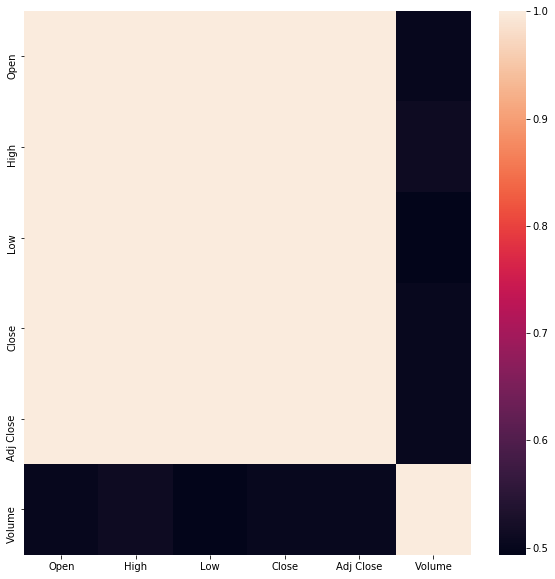

In [18]:
fig, ax = plt.subplots (figsize = (10, 10))
sns.heatmap(variable_correlations, xticklabels = variable_correlations.columns.values,
            yticklabels = variable_correlations.columns.values)

# Detecting Outliers using a Whisker Plot

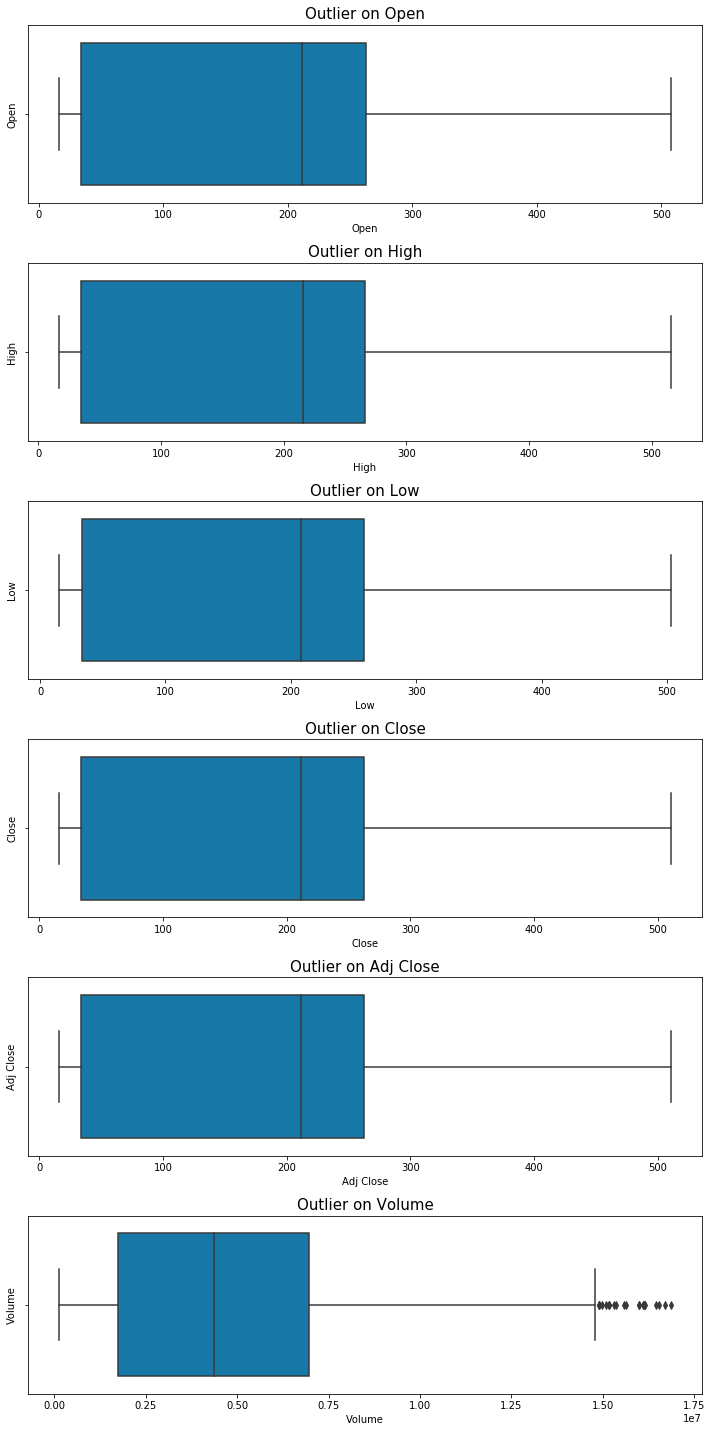

In [33]:
fig, ax = plt.subplots (len(variable_values), figsize = (10, 20))
for i, col_list in enumerate(variable_values):
    sns.boxplot(tesla[col_list], ax = ax[i], palette = "winter", orient = 'h')
    ax[i].set_title("Outlier on" + " " + col_list, fontsize = 15)
    ax[i].set_ylabel(col_list, fontsize = 10)
    fig.tight_layout(pad = 1.1)

From the above whisker plot, we see clearly some form of outliers across all the column variables in our dataset. As such, we will employ the Interquartile Range Method or the Z-score approach to deal with the outliers

In [21]:
average_measures = tesla.describe()
average_measures = average_measures.T 

#Interquartile Range Approach
average_measures['IQR'] = average_measures['75%'] - average_measures['25%']

#Z-score Approach
tesla = tesla[(np.abs(stats.zscore(tesla[['Open', 'High', 'Low', 
                                       'Close', 'Adj Close', 'Volume']])) < 3).all(axis = 1)] 
tesla = tesla.reset_index() #resetting the index of the dataset
tesla


,level_0,index,Date,Open,High,Low,Close,Adj Close,Volume
0,2,2,2010-07-01,25.00,25.92,20.27,21.96,21.96,8218800
1,3,3,2010-07-02,23.00,23.10,18.71,19.20,19.20,5139800
2,4,4,2010-07-06,20.00,20.00,15.83,16.11,16.11,6866900
3,5,5,2010-07-07,16.40,16.63,14.98,15.80,15.80,6921700
4,6,6,2010-07-08,16.14,17.52,15.57,17.46,17.46,7711400
...,...,...,...,...,...,...,...,...,...
2310,2351,2393,2019-12-31,405.00,421.29,402.08,418.33,418.33,10285700
2311,2352,2394,2020-01-02,424.50,430.70,421.71,430.26,430.26,9532100
2312,2354,2396,2020-01-06,440.47,451.56,440.00,451.54,451.54,10133000
2313,2356,2400,2020-01-10,481.79,484.94,473.70,478.15,478.15,12959500


# Trend Analysis of the Tesla Stock

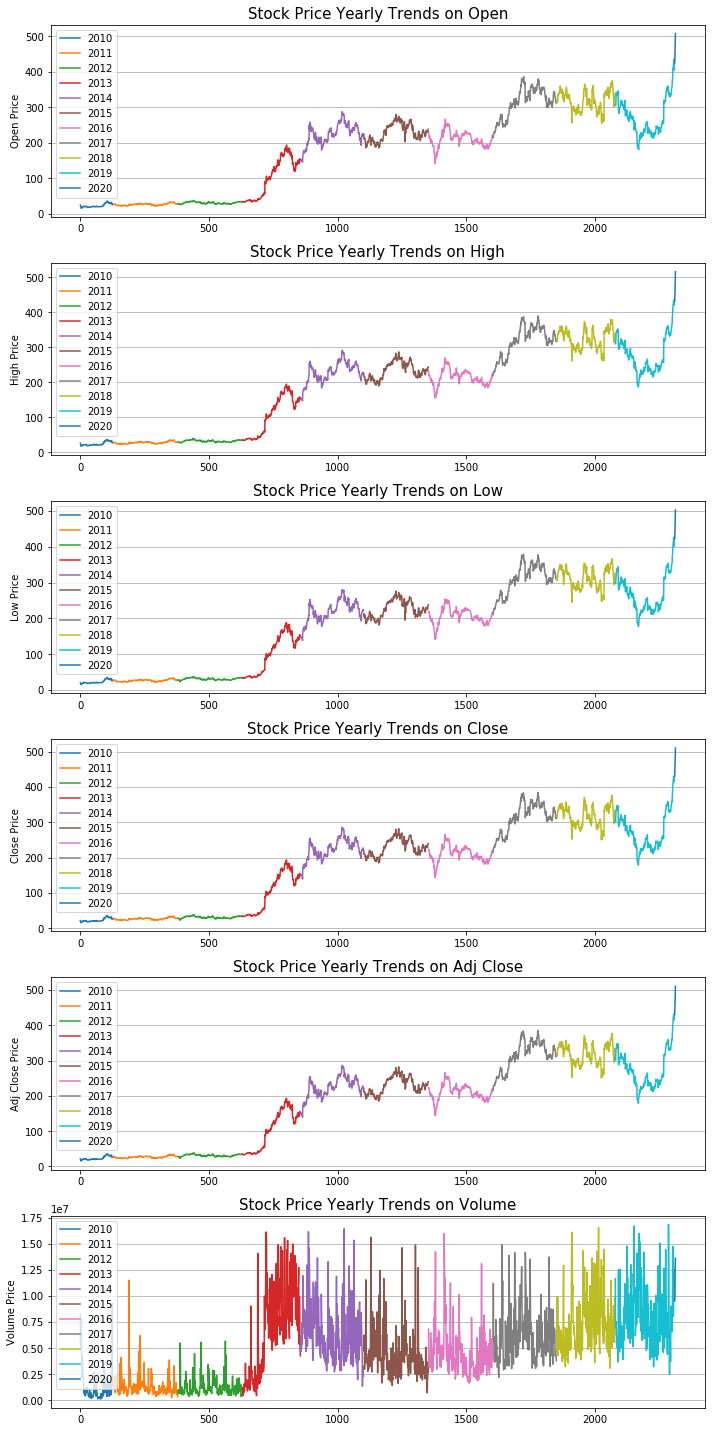

In [24]:

tesla['Year'] = tesla['Date'].dt.year
tesla['Month'] = tesla['Date'].dt.month
tesla['WeekDay'] = tesla['Date'].dt.weekday

fig, ax = plt.subplots(len(variable_values), figsize = (10, 20))

# Get yearly data and plot
for i, col_list in enumerate(variable_values):
    tesla.groupby('Year')[col_list].plot(ax = ax[i], legend = True)
    ax[i].set_title("Stock Price Yearly Trends on" + " " + col_list, fontsize = 15)
    ax[i].set_ylabel(col_list + " " + "Price", fontsize = 10)
    fig.tight_layout(pad = 1.1)
    ax[i].yaxis.grid(True) 

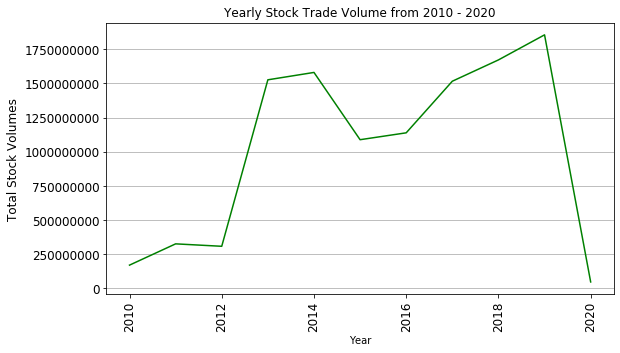

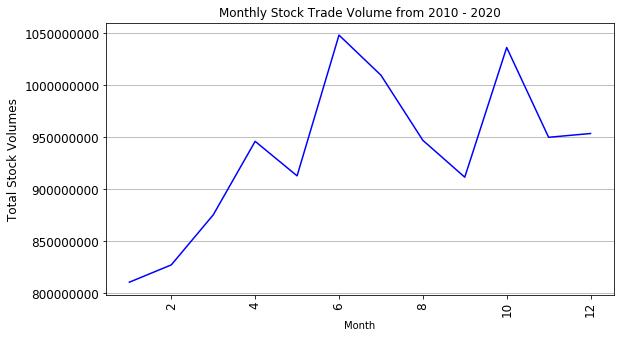

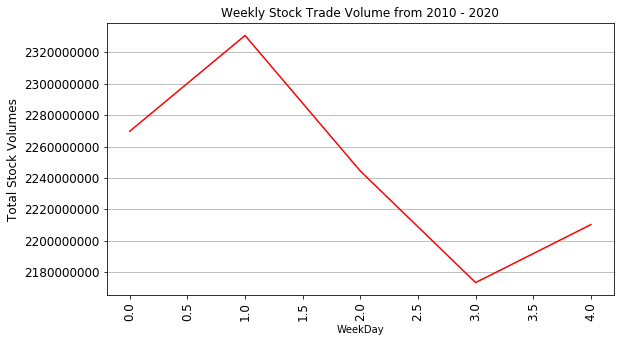

In [25]:
# Trends on Yearly Stock Trade Volume
check = tesla.groupby('Year')['Volume'].sum()
plt.figure(figsize = (20, 5))
ax1 = plt.subplot(121)
check.plot(y = "Volume", legend = False, fontsize = 12, 
           sharex = False, title = "Yearly Stock Trade Volume from 2010 - 2020", rot = 90, color = "green")
ax1.ticklabel_format(useOffset = False, style = 'plain')
ax1.set_ylabel("Total Stock Volumes", fontsize = 12)
ax1.yaxis.grid(True)

# Trends on Monthly Stock Trade Volume
check = tesla.groupby('Month')['Volume'].sum()
plt.figure(figsize = (20, 5))
ax1 = plt.subplot(121)
check.plot(y = "Volume", legend = False, fontsize = 12, 
           sharex = False, title = "Monthly Stock Trade Volume from 2010 - 2020", rot = 90, color = "blue")
ax1.ticklabel_format(useOffset = False, style = 'plain')
ax1.set_ylabel("Total Stock Volumes", fontsize = 12)
ax1.yaxis.grid(True)

# Trends on weekly stock trade volume
check = tesla.groupby('WeekDay')['Volume'].sum()
plt.figure(figsize = (20, 5))
ax1 = plt.subplot(121)
check.plot(y = "Volume", legend = False, fontsize = 12, sharex = False, title = "Weekly Stock Trade Volume from 2010 - 2020", rot = 90, color = "red")
ax1.ticklabel_format(useOffset = False, style = 'plain')
ax1.set_ylabel("Total Stock Volumes", fontsize = 12)
ax1.yaxis.grid(True)

# Analysing the Trading Volume of the Stock using a Pie Chart

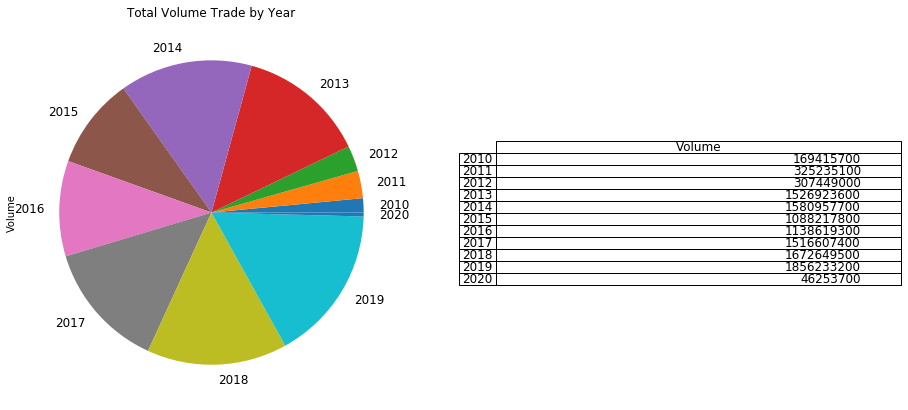

In [30]:

for i, col_list in enumerate(variable_values):
    pie_variables = tesla.groupby('Year')[col_list].sum()

pie_variables = pd.DataFrame(pie_variables)

plt.figure(figsize = (16, 7))
ax1 = plt.subplot(121)
pie_variables.plot(kind = "pie", y = "Volume", legend = False, fontsize = 12, 
                   sharex = False, title = "Total Volume Trade by Year", ax = ax1)

ax2 = plt.subplot(122)
plt.axis('off') 
col_vector = table(ax2, pie_variables, loc = 'center')
col_vector.auto_set_font_size(False)
col_vector.set_fontsize(12)
plt.show()

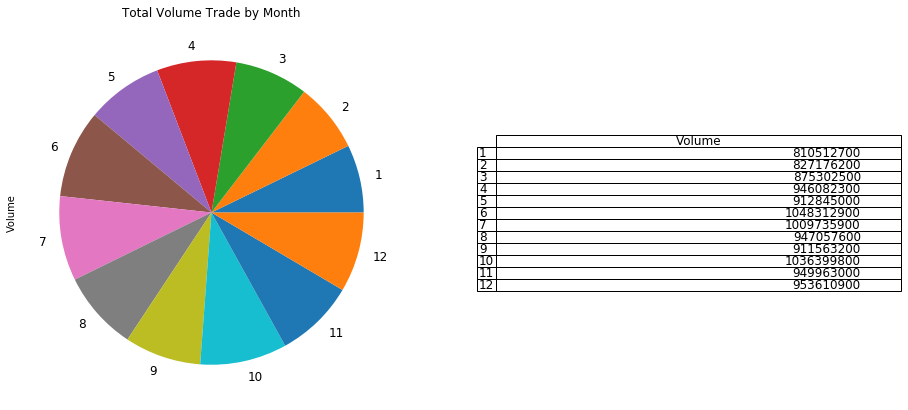

In [31]:

for i, col_list in enumerate(variable_values):
    pie_variables = tesla.groupby('Month')[col_list].sum()
    
pie_variables = pd.DataFrame(pie_variables)

plt.figure(figsize = (16, 7))
ax1 = plt.subplot(121)
pie_variables.plot(kind = "pie", y = "Volume", legend = False, fontsize = 12, 
                   sharex = False, title = "Total Volume Trade by Month", ax = ax1)

ax2 = plt.subplot(122)
plt.axis('off') 
col_vector = table(ax2, pie_variables, loc = 'center')
col_vector.auto_set_font_size(False)
col_vector.set_fontsize(12)
plt.show()

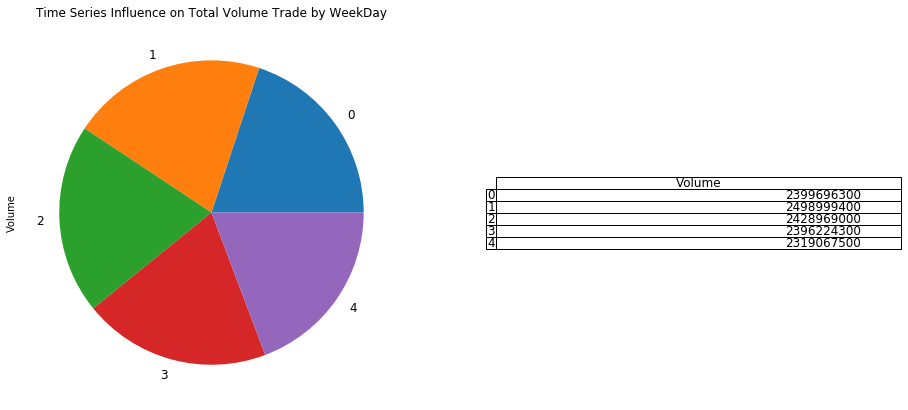

In [60]:
# Analyse based on Year
for i, col_list in enumerate(Column_List):
    var = Data.groupby('WeekDay')[col_list].sum()
    
# Convert the variable into a pandas dataframe
var = pd.DataFrame(var)

# Plot to understand the trend
plt.figure(figsize = (16, 7))
ax1 = plt.subplot(121)
var.plot(kind = "pie", y = "Volume", legend = False, fontsize = 12, sharex = False, title = "Time Series Influence on Total Volume Trade by WeekDay", ax = ax1)

# Plot the table to identify numbers
ax2 = plt.subplot(122)
plt.axis('off') # Since we are plotting the table
tbl = table(ax2, var, loc = 'center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
plt.show()


# Findings and Conclusion


In this project we have successfully explored and visualized the tesla stock data from  2010 - 2020. 

The recurring theme in all our findings is that the stock significantly spiked on the average beginning from 2013 till date both in trade volumes and values. We can take the 2020 data points on yearly analysis with a pinch of salt since it only captures 2 months.

To avoid a negatively skewed analysis and conclusion, We have carefully detected and removed outliers from the dataset. And it is not surprising that the variables are highly correlated. This is a confirmation on the average significant jump in the demand for the stock for the period under consideration.

The dataset we used in this analysis doesn't capture the required variables for us to investigate the reasons for this significant spike. While we may be tempted to adduce the reasons to company policy and market dynamics, we can be fairly confident that this spike may continue into the foreseeable future, at least for 2020. 

We will focus the next part of this project on testing the stationarity of the variables and implementing time series forecasting methods to predict the stock market trades for both short-term and long-term horizons.



# References

1. This notebook is an edit of Swaminathan Meenakshisundaram's [tesla stock analysis project on Kaggle](https://www.kaggle.com/swaminathan470/extensive-eda-analysis-on-tesla-stock-data). It contains further data cleaning and an adjusted analysis workflow. 

2. [Tesla Wikipedia page](https://en.wikipedia.org/wiki/Tesla,_Inc.)
3. [Yahoo Finance Tesla Data](https://finance.yahoo.com/quote/TSLA)